### Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Read Files

In [2]:
df = pd.read_csv('uc_comed_two_years_final.csv', header = 'infer')
df.columns

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index([u'METER_ID', u'DATETIME', u'TERM', u'BD_ID', u'CLON', u'CLAT',
       u'DISCRIPT1', u'USAGE', u'SQFT', u'GROUP_ID', u'GROUP_NAME',
       u'LINKED_METERS'],
      dtype='object')

In [3]:
df.DISCRIPT1.unique()

array(['Bernard Mitchell Hospitial', 'John Crerar Library',
       'Steam Plant Power Plant', 'Chapin Hall',
       'Social Science Research Building',
       'Duchossois Center for Advanced Medicine', 'Harris School',
       'Kovler Laboratories', 'Hinds Laboratory',
       'American School Building', 'Cummings Life Sciences Center',
       'Bookstore', 'Laird Bell Law Quadrangle',
       'A.J. Carlson Animal Research Facility', 'Henry Crown Field House',
       'Breckinridge House', 'Chicago Lying-In Hospital',
       'Surgery Brain Research Institude', 'Campus Student Center',
       'Residential', 'Alber Merrit Billings Hospital',
       "Sylvan & Arma Wyler Children's Hospital", 'Walker Museum',
       'Woodlawn Social Service Center', 'Peck Pavilion', 'Pick Hall',
       'University Service Building (ATS)', 'Stagg Field Building',
       'Eckhart Hall', 'Ellis Avenue Parking Strucutre', 'Levi Hall',
       'BSDLC', 'Charles M. Harper Center', 'Stuart Hall', 'Anatomy',
       'New

Pick a building and isolate meters

In [4]:
df_BMH = df[df['DISCRIPT1'] == 'Bernard Mitchell Hospitial']

In [5]:
df_BMH.METER_ID.unique()

array([ 79039684, 141739814])

In [6]:
df_BMH_meter1 = df_BMH[df_BMH['METER_ID'] == 79039684]
df_BMH_meter2 = df_BMH[df_BMH['METER_ID'] == 141739814]

Pick a term

In [7]:
df_BMH_meter1_summer14 = df_BMH_meter1[df_BMH_meter1['TERM'] == 'Summer 2014']
df_BMH_meter2_summer14 = df_BMH_meter2[df_BMH_meter2['TERM'] == 'Summer 2014']
df_BMH_summer14 = df_BMH[df_BMH['TERM'] == 'Summer 2014']

Plot to see what the two meters' data looks like

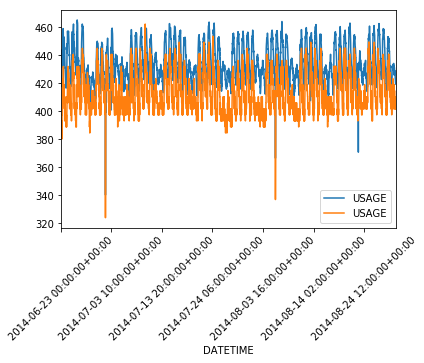

In [8]:
ax = df_BMH_meter1_summer14.plot(x = 'DATETIME', y = 'USAGE', rot = 45)
df_BMH_meter2_summer14.plot(x = 'DATETIME', y = 'USAGE', rot = 45, ax = ax)

### Example: Let's look at the week of the 23rd (23-06-2014 is a Monday) for meter1 (ID = 79039684)

In [9]:
## convert datetime to pandas datetime format
df_BMH_meter1_summer14['pd_datetime'] = pd.to_datetime(df_BMH_meter1_summer14['DATETIME'])


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [10]:
## getting rid of some random warning messages
pd.options.mode.chained_assignment = None

In [12]:
## This will create a column that just has the month and the year like 'June-2014'
df_BMH_meter1_summer14['mnth_yr'] = df_BMH_meter1_summer14['pd_datetime'].apply(lambda x: x.strftime('%B-%Y'))     

## This will create a column with just the day of the month
df_BMH_meter1_summer14['date'] = df_BMH_meter1_summer14['pd_datetime'].apply(lambda x: x.strftime('%d'))

## This will create a column of with the day of the week 
df_BMH_meter1_summer14['day'] = df_BMH_meter1_summer14['pd_datetime'].apply(lambda x: x.strftime('%A'))

## This will isolate the time value
df_BMH_meter1_summer14['time'] = df_BMH_meter1_summer14['pd_datetime'].apply(lambda x: x.strftime('%X'))

In [13]:
## First select the entries for 'June-2014'
df_1 = df_BMH_meter1_summer14[df_BMH_meter1_summer14['mnth_yr'] == 'June-2014']

## Pick out entries for the days in June-2014 that we want
df_monday_20140623 = df_1[df_1['date'] == '23']
df_tuesday_20140624 = df_1[df_1['date'] == '24']
df_wednesday_20140625 = df_1[df_1['date'] == '25']
df_thursday_20140626 = df_1[df_1['date'] == '26']
df_friday_20140627 = df_1[df_1['date'] == '27']
df_saturday_20140628 = df_1[df_1['date'] == '28']
df_sunday_20140629 = df_1[df_1['date'] == '29']

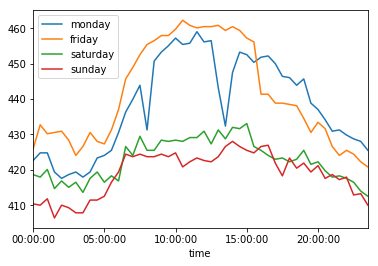

In [14]:
## plot in the same graph

ax = df_monday_20140623.plot(x = 'time', y = 'USAGE', label = 'monday')
#df_tuesday_20140624.plot(x = 'time', y = 'USAGE', ax = ax, label = 'tuesday')
#df_wednesday_20140625.plot(x = 'time', y = 'USAGE', ax = ax, label = 'wednesday')
#df_thursday_20140626.plot(x = 'time', y = 'USAGE', ax = ax, label = 'thursday')
df_friday_20140627.plot(x = 'time', y = 'USAGE', ax = ax, label = 'friday')
df_saturday_20140628.plot(x = 'time', y = 'USAGE', ax = ax, label = 'saturday')
df_sunday_20140629.plot(x = 'time', y = 'USAGE', ax = ax, label = 'sunday')